In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/afoone/caipc-mar-2023/master/data/Iris.csv')

In [3]:
df.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [5]:
df.shape

(150, 6)

In [6]:
df['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    df[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']], 
    df['Species'],
    train_size = 0.8,
    shuffle= True)


In [8]:
X_train.shape

(120, 4)

In [9]:
y_train.value_counts()

Iris-setosa        43
Iris-versicolor    41
Iris-virginica     36
Name: Species, dtype: int64

In [10]:
from  sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(criterion='gini')

In [11]:
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [12]:
prediction = model.predict(X_test)

In [13]:
prediction

array(['Iris-setosa', 'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-virginica', 'Iris-virginica', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-virginica',
       'Iris-setosa', 'Iris-setosa', 'Iris-virginica', 'Iris-versicolor',
       'Iris-setosa', 'Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-versicolor'],
      dtype=object)

In [14]:
y_test

22         Iris-setosa
85     Iris-versicolor
52     Iris-versicolor
26         Iris-setosa
138     Iris-virginica
39         Iris-setosa
116     Iris-virginica
79     Iris-versicolor
147     Iris-virginica
53     Iris-versicolor
124     Iris-virginica
127     Iris-virginica
86     Iris-versicolor
103     Iris-virginica
60     Iris-versicolor
100     Iris-virginica
11         Iris-setosa
35         Iris-setosa
109     Iris-virginica
91     Iris-versicolor
6          Iris-setosa
121     Iris-virginica
57     Iris-versicolor
0          Iris-setosa
125     Iris-virginica
123     Iris-virginica
111     Iris-virginica
148     Iris-virginica
128     Iris-virginica
93     Iris-versicolor
Name: Species, dtype: object

In [15]:
(y_test == prediction).sum()/len(y_test)

1.0

# Visualizar un árbol de decisión

In [16]:
from sklearn.tree import export_graphviz

In [17]:
with open('./tree.dot', 'w') as dotfile:
    export_graphviz(model, out_file=dotfile, feature_names=['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'])
    dotfile.close()

In [18]:
import os

In [20]:
from graphviz import Source

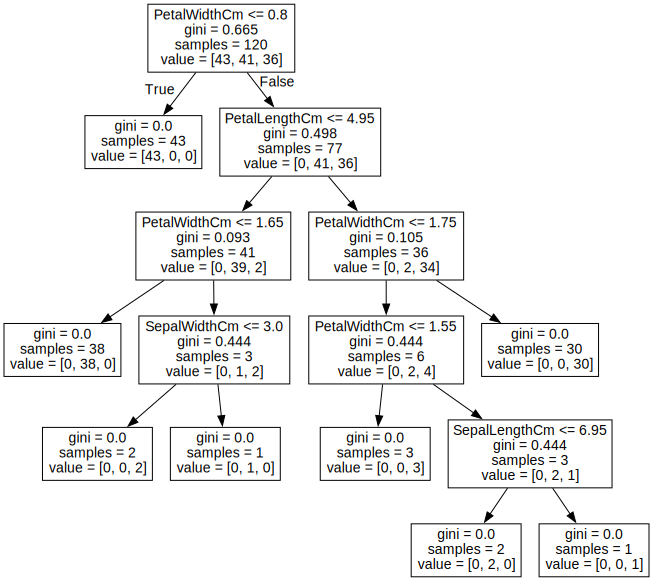

In [21]:
file = open('./tree.dot', 'r')
text = file.read()
Source(text)

In [22]:
from sklearn.model_selection import KFold

df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [23]:
X_kf = df [['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]
y_kf = df ['Species']

In [24]:
kf  = KFold(n_splits=5, shuffle=True, random_state=9348)

In [26]:
kf.n_splits

5

In [34]:
results = []

for train_index, test_index in kf.split(X_kf):
    X_train, X_test = df[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']].iloc[train_index], df[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']].iloc[train_index]
    y_train, y_test = df['Species'].iloc[train_index], df['Species'].iloc[train_index]
    est = DecisionTreeClassifier(criterion='gini')
    est.fit(X_train, y_train)
    prediction = est.predict(X_test)
    results.append((y_test == prediction).sum()/len(y_test))

results

[1.0, 1.0, 1.0, 1.0, 1.0]

In [36]:
np.mean(results)

1.0

# Random forest

In [39]:
from sklearn.ensemble import RandomForestClassifier

In [47]:
X_train, X_test, y_train, y_test = train_test_split(
    df[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']], 
    df['Species'],
    train_size = 0.8,
    shuffle= True)

In [48]:
model = RandomForestClassifier(n_estimators=10, criterion='gini', oob_score=True)

In [49]:
model.fit(X_train, y_train)

/Users/atienda/miniforge3/envs/caipcmarzo/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


RandomForestClassifier(n_estimators=10, oob_score=True)

In [51]:
X_test.shape

(30, 4)

In [52]:
predction = model.predict(X_test)

In [53]:
((predction == y_test).sum())/len(predction)

0.9666666666666667

# Overfitting y poda

- El ovefitting se produce en los árboles cuando se acerca demasiado a los datos de entrenamiento.

Hay dos formas de solucionarlo: 

- Por profundidad: liminar la profundidad de los árboles:

```python
model = DecisionTreeClassifier(criterion='gini', max_depth=3)
```
- Por el criterio de parada, por ejemplo por el número de muestras

```python
model = DecisionTreeClassifier(criterion='gini', min_samples_split=6)
```


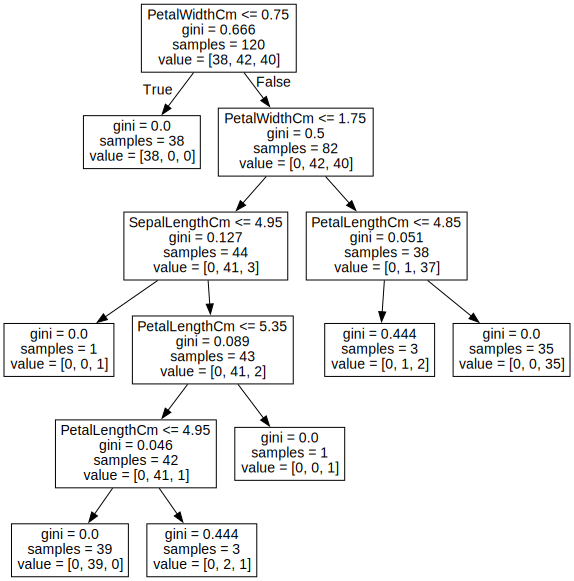

In [56]:
X_train, X_test, y_train, y_test = train_test_split(
    df[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']], 
    df['Species'],
    train_size = 0.8,
    shuffle= True)

model = DecisionTreeClassifier(criterion='gini', min_samples_split=6)

model.fit(X_train, y_train)

with open('./tree2.dot', 'w') as dotfile:
    export_graphviz(model, out_file=dotfile, feature_names=['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'])
    dotfile.close()

file = open('./tree2.dot', 'r')
text = file.read()
Source(text)

